# __The Mathematics of Imaging__
> __Presenter__: Matthew Blackledge \
> Division of Radiotherapy and Imaging \
> Institute of Cancer Research

In [ ]:
# Essential plotting and scientific libraries
import matplotlib.pyplot as pl
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import numpy as np

from numpy import fft

from skimage.io import imread
from skimage.transform import resize

# IPython display imports
from ipywidgets import interact, FloatSlider, IntSlider, RadioButtons, Button, HBox, VBox
from IPython.display import Image, display, clear_output

from scipy.misc import face
face = face() # An example image we can use

import wave
import pyaudio
import struct

from scipy.signal import convolve2d

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; height:95%; }</style>"))


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<h1><center>The Mathematics of Imaging</center></h1>
<h3><center>Presenter: Matthew Blackledge</center></h3>
<center>Division of Radiotherapy and Imaging</center>
<center>Institute of Cancer Research</center>

## Contents
<br>
<div style="float: left; width: 33%;">
<b>Lecture 1</b><br><br>
<u> Image formation </u>
<ul>
<li>Representation of Images</li>
<li>Convolution</li>
<li>Fourier Series</li>
<li>Fourier Transforms</li>
</ul>
</div>

<div style="float: left; width: 33%;">
<b>Lecture 2</b><br><br>
<u> Describing Imaging Systems </u>
<ul>
<li>Linear Systems</li>
<li>Point Spread Function</li>
<li>Shift Invariance</li>
<li>Separability</li>
<li>Transfer Functions</li>
</ul>
<br><br>
<u> Sampling Theory </u>
<ul>
<li>The Comb and Rectangle Functions</li>
<li>Finite Apertures and Sampling Rates</li>
<li>Nyquist-Shannon Theory</li>
<li>Aliasing</li>
<li>Pre-Sample Blurring</li>
</ul>

</div>
<div style="float: left; width: 33%;">
<b>Lecture 3</b><br><br>
<u>Image Enhancement and Filtering</u><br>
<ul>
<li>Point Operators</li>
<li>Spatial Operators</li>
<li>Transform Operators</li>
</ul>
<br><br>
<u>Noise</u><br>
<ul>
<li>Noise Distributions</li>
<li>Noise Filtering</li>
<li>Practical Considerations of Noise</li>
</ul>
</div>

## History of the Course

<u>Handouts</u><br>
Provided by Dr Mike Partridge<br>(Radiotherapy Research, Oxford University)

<u>Course Delivery</u> <br>
$\rightarrow$ 2017:  Mike Partridge<br>
2018 $\rightarrow$:  Matthew Blackledge

## About these slides
- Content is based on the handout from previous years (but may add/remove a few things here and there)
<br><br>
- Slides available online at: https://github.com/mattblackledge/mathematicsofimaging
<br><br>
- Keep a lookout on this website as these slides will evolve into new versions (feedback to improve them is always welcome!)
<br><br>
- These slides are __interactive!__ You can use an IPython/Jupyter notebook to try this for yourself. (If you don't know Python then don't worry, it is used here to demonstrate the core principles)
<br><br>
- We cannot cover everything!  Imaging is a large field and still a very active area of research.  This should be treated as introductory.

## Useful Resources

<table style="width:100%">
  <col width="20%">
  <col width="80%">
  <tr>
    <td><img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/GonzalezBook.jpg?raw=1", width="160", height="62"></th>
    <td style="text-align:left;font-size:35px"><b>Digital Image Processing</b>, R. C. Gonzales and R. E. Woods, Pearson</td>
  </tr>
  <tr>
    <td><img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/WebbBook.jpg?raw=1", width="160", height="42"></th>
    <td style="text-align:left;font-size:35px"><b>Webb's Physics of Medical Imaging</b>, M. A. Flower (Ed.), CRC Press</td>
  </tr>
  <tr>
    <td><img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/YooBook.jpg?raw=1", width="160", height="50"></th>
    <td style="text-align:left;font-size:35px"><b>Insight Into Images</b>, T. S. Yoo (Ed.), ITK</td>
  </tr>
</table>

## Useful Resources

<table style="width:100%">
  <col width="20%">
  <col width="80%">
  <tr>
    <td><img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/BlackledgeBook.jpg?raw=1", width="160", height="42"></th>
    <td style="text-align:left;font-size:35px"><b>Digital Image Processing</b>, J. M. Blackledge, Woodhead Publishing</td>
  </tr>
  <tr>
    <td><img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/BookLangtangen.jpg?raw=1", width="160", height="42"></th>
    <td style="text-align:left;font-size:35px"><b>A Primer on Scientitifc Programming with Python</b>, H. P. Langtangen, Springer</td>
  </tr>
</table>

# A brief history of Imaging

<span style="font-size:15.0;">(based on material in: Mait, J. N. (2006). <br>A History of Imaging: Revisiting the Past to Chart the Future. Optics and Photonics News, 17(2), 22) </span>

<h2>750-0 BCE</h2>
<div style="float: left; width: 50%;">
  <center>
  <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/NimrudLens.jpg?raw=1", width="50%">
    </center>
</div>
<div style="float: right; width: 50%;">
<ul>
    <li>The "Nimrud Lens" is an example of a lens used in the Ayssirian Empire... perhaps used as a magnifying glass or to start fires?
       </ul>
</div>

<div style="float: left; width: 50%;">
<center>
  <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/euclid.jpg?raw=1", width="40%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
    <li>Around 300 BCE Euclid writes "Optics", the earliest known text on the mathematics of vision<br><br> (angle of reflection = angle of incidence).  
</ul>        
</div>

<h2>1270</h2>
<div style="float: left; width: 50%;">
<center>
  <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/glasses.jpg?raw=1", width="50%">
<center>
  <span style="font-size: 12pt">The Glasses Apostle by Conrad von Soest (1403).</span>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Eye glasses first invented in Italy. <br><br>
 <li> Glass making was moved to the island of Murano (Venice).<br><br>
 <li> Kept a closely guarded secret for almost 300 years.
    </ul>
</div>

<h2>Ca. 1610</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/galileo_complete.jpg?raw=1", width="70%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> First telescope patent in 1608 by Hans Lippershey<br><br>
 <li> In 1609, Gailileo Galilei improves the design and uses it to observe the rings of Saturn for the first time.
</ul>
</div>

<h2>1611-1612</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/kepler_neri.pdf?raw=1", width="50%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Johannes Kepler and Antonio Neri publish books on basic optics and manufacture of high quality glass. <br><br>
 <li> This puts the Venetians out of business!
</ul>
</div>

<h2>1621</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/snell.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Snell derives the law of refraction. <br><br>
 <li> This proves to be the key for more accuracte lens design (Descartes figures out how to remove spherical abberations).
</ul>
</div>

<h2>Ca. 1670</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/newton.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Newton provides an understanding of the distance an image will be projected through a lens with focal distance, $f$.<br><br>
 <li> Also makes many advances in the understanding of light, including the fact that white light is composed of different colours.<br><br>
    <li> He asserts that light is made up of <b>particles</b>.
</ul>
</div>

<h2>Ca. 1800</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/young.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Thomas Young re-establishes the theory of light as a <b>wave</b> through his interference and double-slit experiments.<br><br>
</ul>
</div>

<h2>1865</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/maxwell.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Maxwell publishes "A Dynamical Theory of the Electromagnetic Field", which unifies the laws of electromganetism and demonstrates the mathematical principles of light as a wave of the EM-field.<br><br>
 <li> Using his framework, derives the speed of light in a vacuum, $c$: the maximum speed at which matter and infromation can travel.
</ul>
</div>

<h2>1830-1840</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/daguerre.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Daguerre introduces the "Daguerreotype", the first popular monochrome phtoraphic method.<br><br>
 <li> Captures images on a polished silver-surfaced plate, and primrily used for portraits.
</ul>
</div>

<h2>1855</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/maxwell_RGB.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> While studying the psychology of color, Maxwell proposes that a color image could be made by combining monochrom images taken through reg, green and blue filters. <br><br>
 <li> These images were superimposed onto one another using three projectors with the same filters to create the first color photograph in 1861.<br><br>
 <li> Largely forgotten for two decades, it would not be until 1907 that color photography would be commercialized.
     
</ul>
</div>

<h2>1948</h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/shannon.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> Focus had been on the storage and transmission of <b>analogue</b> signals (e.g. for transmission of radio signal, telephone calls and storage of images) <br><br>
 <li> In 1948 Calude Shannon published his paper "A Mathematical Theory of Communication" in which he founded "information theory"<br><br>
 <li> This included optimisation of methods for sending messages from place to another in the presence of noise <b> without loss of quality</b>.<br><br>
 <li> Led to the invention of the information 'bit' and established <b>digital</b> communication.
     
</ul>
</div>

<h2>1957 - </h2>
<div style="float: left; width: 50%;">
<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/digital.pdf?raw=1", width="80%">
</center>
</div>
<div style="float: right; width: 50%;">
<ul>
 <li> First digital image stored on a computer in 1957 <br><br>
 <li> Development of the CCD in 1969 meant that digital photgraphy could be acquired at source (now largely replaced by active pixel sensors - APS).<br><br>
 <li> The increasing storage capacity of modern computers allows for easy storage of images.<br><br>
 <li> The invention of the internet allows us to easily share these digital images worldwide.<br><br>
</ul>
</div>

# Representation of Images

## Pixel Space
 - Thanks to technologies like the charge-couple device (CCD), images are now represented digitally through 'pixels'<br><br>
 - The position of each pixel is represented in 2-dimensinal space by the indices $(j, i)$, which can be converted to real-space coordinates through knowledge of the __origin__ $(O_{x}, O_{y})$ and __resolution__ $(r_{x}, r_{y})$:<br><br>
 <center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pixels_.jpg?raw=1", width = 60%>
 </center>

 - In general we also need to think about the __orientation__, $\theta$, of the image with respect to real-space coordinates (however we chose them).<br><br>
 <center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pixels_full.jpg?raw=1", width = 60%>
 </center>

## Pixel Values
Image information is stored by assigning a numeric value to each pixel:

In [ ]:
# Extract the red colour channel from the image
R_channel = face[::-1, :, 0]

zoom_slider = FloatSlider(min=1.00, max=70.0, step=1, value=1.0, continuous_update=False)

# decorate the plot function with an environment from the UIs:
@interact(zoom=zoom_slider)
def plot(zoom):
    fig = pl.figure(figsize = (13, 9))
    ax = fig.add_subplot(111)
    ax.imshow(R_channel, cmap = 'gray', interpolation = 'None', origin = 'upper')

    # Set the viewport to display a zoomed in version of the image
    zoom_factor = 1.0/zoom
    xRange = [int(face.shape[1] / 2 * (1 - zoom_factor)), int(face.shape[1] / 2 * (1 + zoom_factor))]
    yRange = [int(face.shape[0] / 2 * (1 - zoom_factor)), int(face.shape[0] / 2 * (1 + zoom_factor))]
    ax.set_xlim(*xRange)
    ax.set_ylim(*yRange)
    ax.set_xlabel('i'), ax.set_ylabel('j')

    # If the zoom factor is high enough then display the pixel values
    if zoom >= 50:
        for i in range(xRange[0]+1, xRange[1]):
            for j in range(yRange[0]+1, yRange[1]):
                if R_channel[j, i] < 100:
                    color = 'w'
                else:
                    color = 'k'
                ax.text(i, j, "%d"%R_channel[j, i],
                        verticalalignment = 'center', horizontalalignment = 'center', 
                        color = color, fontsize = 13)

    pl.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description=u'zoom', max=70.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

## Colour spaces

For example, the pixel value might represent the amount of 'red', 'green' and 'blue' in the image (so called RGB colour space)

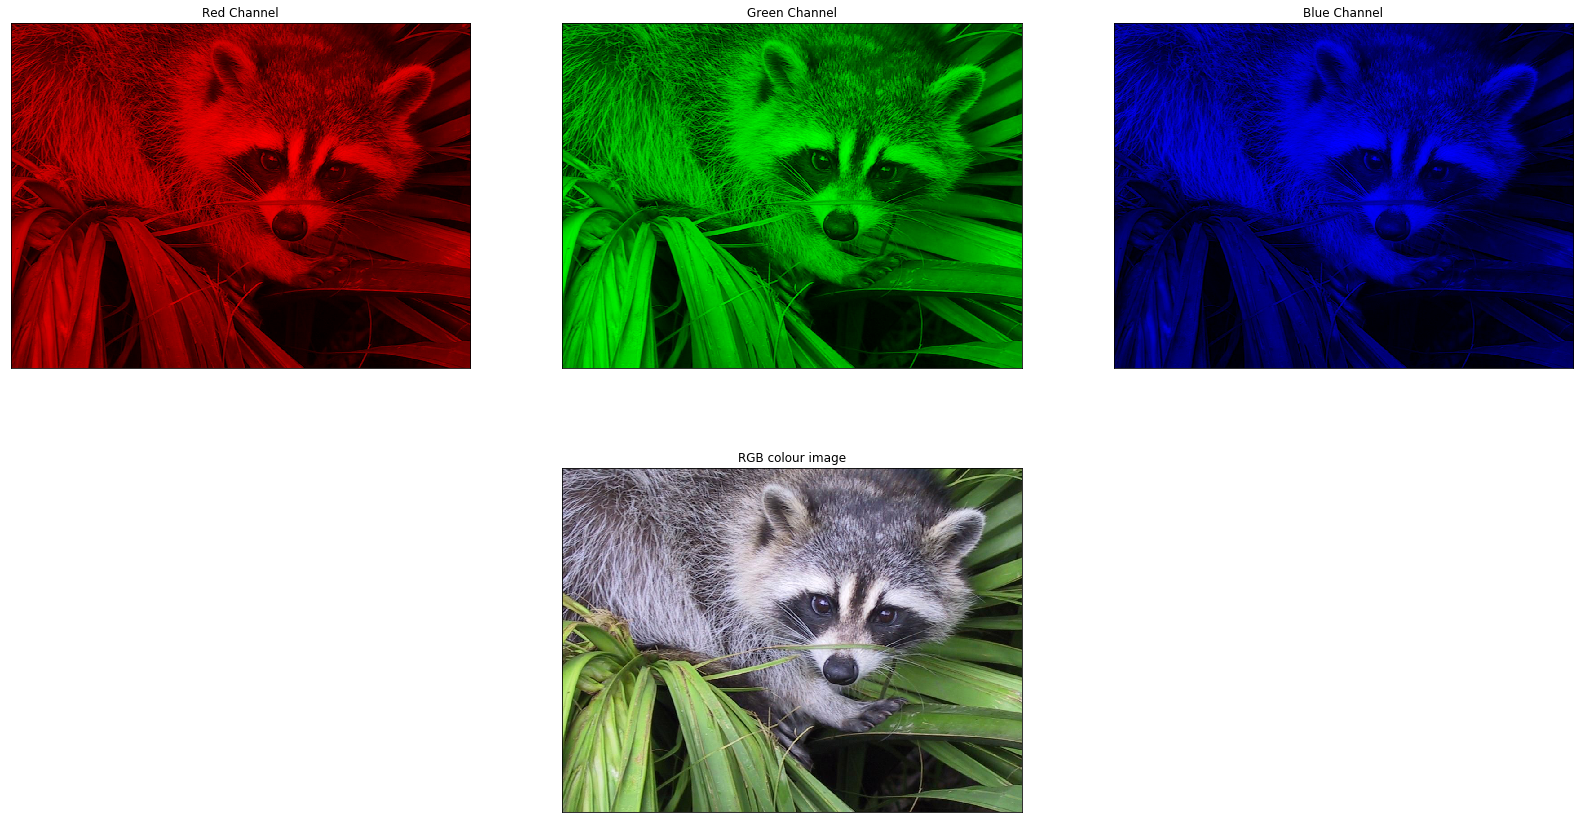

In [ ]:
# Extract the red colour channel from the image
R_channel = face[:, :, 0]
G_channel = face[:, :, 1]
B_channel = face[:, :, 2]

# Cretate a red colormap
colors = [(0, 0, 0), (1, 0, 0)] # Black -> Red
cm_red = LinearSegmentedColormap.from_list("blackred", colors, N=256)

# Cretate a green colormap
colors = [(0, 0, 0), (0, 1, 0)] # Black -> Green
cm_green = LinearSegmentedColormap.from_list("blackgreen", colors, N=256)

# Cretate a blue colormap
colors = [(0, 0, 0), (0, 0, 1)] # Black -> Blue
cm_blue = LinearSegmentedColormap.from_list("blackblue", colors, N=256)

f = pl.figure(figsize = (28, 15))
ax1 = f.add_subplot(231)
ax1.imshow(R_channel, cmap = cm_red, interpolation = 'None')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Red Channel')

ax2 = f.add_subplot(232)
ax2.imshow(G_channel, cmap = cm_green, interpolation = 'None')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Green Channel')

ax3 = f.add_subplot(233)
ax3.imshow(B_channel, cmap = cm_blue, interpolation = 'None')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('Blue Channel')

ax4 = f.add_subplot(235)
ax4.imshow(face, interpolation = 'None')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('RGB colour image')

pl.show()

There are other colour spaces that are of worthy note:
<div style="float: left; width: 33%;">
  <center>
      __CMYK__
      <img src = "images/cmyk.png" style="width:71%;">
      Cyan, magenta, yellow and black are the colours used in some printing systems.
    </center>
</div>
<div style="float: left; width: 33%;">
  <center>
      __RGB__
      <img src = "images/rgb.png" style="width:90%;">
      Most commonly used for displaying digital images using digital devices (e.g. computer monitors).
    </center>
</div>
<div style="float: left; width: 33%;">
  <center>
      __HSV__
      <img src = "images/hsv.png" style="width:90%;">
      Designed to make colour mixing more interpretable by humans.
    </center>
</div>

## The Alpha Channel
Sometime it might be useful to define the 'transparency' of the image when overlaying on top of another. Transparency if quantified by $\alpha$:<br><br>
$$
I_{final} = (1-\alpha) \cdot I_{1} + \alpha \cdot I_{2}
$$

In [ ]:
# Invert the image in the y-direction
face_inverse = face[::-1, :]

alpha_slider = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.0, continuous_update=False)
    
# decorate the plot function with an environment from the UIs:
@interact(alpha=alpha_slider)
def plot(alpha):

    fig = pl.figure(figsize = (9, 7))
    ax = fig.add_subplot(111)

    # Add the alpha channel.
    rgb_image = (1-alpha)*face + alpha*face_inverse

    # The image must be byte
    ax.imshow(rgb_image.astype('uint8'), origin = 'upper')
    pl.axis('off')
    pl.show()


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description=u'alpha', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

## The Alpha Channel
<div style="float: left; width: 55%;">
<br>
It is also possible to change the alpha level for each pixel.  This results in RGBA colour spaces: <br><br>
</div>
<div style="float: left; width: 40%;">
<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/rgba.jpg?raw=1" style="width:50%;">
</center>
</div>

Alpha-cahnnels can be used to overlay images on top of one another:

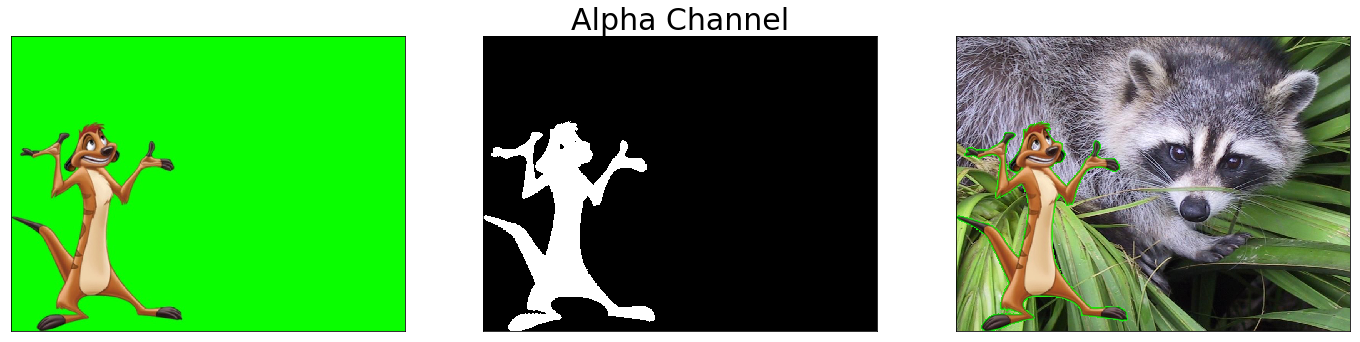

In [ ]:
def display_greenscreen():
    greenscreen = imread("images/greenscreen.jpg")

    # Add an alpha channel to the greenscreen - set to 255 to represent complete opacity
    greenscreen = np.insert(greenscreen, 3, 255, axis = 2).astype('uint8')

    f, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize = (24, 8))

    ax1.imshow(greenscreen)
    ax1.set_xticks([]), ax1.set_yticks([])

    # Now set greenscreen areas alpha to 0
    alpha = 255 * (greenscreen[:, :, 1] < 245)
    greenscreen[:, :, -1] = alpha.astype('uint8')

    ax2.imshow(greenscreen[:, :, 3], cmap = 'gray')
    ax2.set_title('Alpha Channel', fontsize = 30.0)
    ax2.set_xticks([]), ax2.set_yticks([])

    ax3.imshow(face)
    ax3.imshow(greenscreen)
    ax3.set_xticks([]), ax3.set_yticks([])

    pl.show()
    
display_greenscreen()

# Convolution

## Dirac Delta Function

<ul>
 <li> A function introduced by Paul Dirac to describe a point-function or point-mass for use in theoretical physics.<br><br>
 <li> Forms a cornerstone in the mathematics of signal and image processing.<br><br>
 <li> The Delta function, $\delta(x)$ is defined as:
 $$
 \delta(x) = \begin{cases} +\infty,\ x = 0\\\quad 0,\ \text{otherwise}\end{cases}, \qquad \int\limits_{-\infty}^{\infty}\delta(x)\text{d}x = 1
 $$
</ul>
<div style="float: left; width: 50%;">
    <u>Properties</u><br>
    <center>
         $f(0) = \int\limits_{-\infty}^{\infty}f(x)\delta(x)\text{d}x$<br><br>
         $f(a) = \int\limits_{-\infty}^{\infty}f(x)\delta(x - a)\text{d}x\quad$('sifting' property)<br><br>
         $\delta(\alpha x) = \frac{\delta(x)}{|\alpha|}$<br><br> 
         $\delta(-x) = \delta(x)$
    </center>
</div>
<div style="float: right; width: 50%;">
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/delta_func.pdf?raw=1" width="90%">
</div>

## Convolution
<div style="float: left; width: 30%;">
<br>
<ul>
    <li> Consider a point light source emitted through a 'pinhole camera' with finite aperture, and then projected onto a screen behind<br><br>
    <li> The resultant image, $h(x, y)$, is the <b>impulse response function</b> of this camera.
</ul>
</div>
<div style="float: left; width: 60%;">
<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pinhole_projection.pdf?raw=1" style="width:70%;">
</center>
</div>


## Convolution

<div style="float: left; width: 50%;">
<br>
<ul>
<li> What would happen if there were multiple point sources?<br><br>
<li> Rather than a true representation of the point sources, we have multiple circular regions that appear to overlap with one another - the image is a 'smeared' representation of the source.<br><br>
<li> Moreover, if each point source has a different 'brightness', distributed as $f(x, y)$, then final image will be a weighted sumation of the impulse responses.<br><br>
<li> In general we have
   $$
     g(x, y) = \sum\limits_{m = 1}^{M}\sum\limits_{n = 1}^{N} f(x_{m}, y_{n})\cdot h(x - x_{m}, y - y_{n})
   $$<br><br>
<li> Or in the continuous limit $N \rightarrow \infty$ and $M \rightarrow \infty$:
  $$
      g(x, y) = \iint\limits_{-\infty}^{\infty}h(x - \phi, y - \theta)f(\phi, \theta)\text{d}\phi\text{d}\theta
  $$
    
</ul>
</div>
<div style="float: left; width: 50%;">
<br><br>
<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pinhole_projection_multiple.pdf?raw=1" style="width:80%;">
</center>
</div>

## Convolution

This is a process is described by the __convolution__ of one function, $a$, with another, $b$:
$$
  a(x) \circledast b(x) = \int\limits_{-\infty}^{\infty}a(x-\phi)b(\phi)\text{d}\phi = \int\limits_{-\infty}^{\infty}b(x-\phi)a(\phi)\text{d}\phi
$$

In [ ]:
convolution_slider = FloatSlider(min=0.0, max=0.8, step=0.01, value=0.0, continuous_update=False)
    
# decorate the plot function with an environment from the UIs:
@interact(x=convolution_slider)
def convolve_demo(x):
    
    theta = np.linspace(0, 1, 1000)

    a = 1.0 * (theta < 0.2)
    b = 10*theta - 4
    b[theta.size/2::] = b[theta.size/2:0:-1]
    b[b<0] = 0
    
    fig = pl.figure(figsize = (20, 5))
    ax1 = fig.add_subplot(121)
    ax1.plot(theta, np.roll(a, int(x*1000)), 'r-', label =  r'a($\phi$)')
    ax1.plot(theta, b, 'b-', label = r'b($\phi$)')
    ax1.set_xlabel(r'$\phi$', fontsize = 20.0)
    pl.legend(loc = 1, fontsize = 20.0)

    c = np.zeros(len(theta))
    for i in range(int(x*1000)):
        c[i+100] = np.sum(np.roll(a, i) * b)
        
    ax2 = fig.add_subplot(122)
    ax2.plot(theta, c, 'g-', label = 'c(x)')
    ax2.plot([x + 0.1], c[int(x*1000) + 99], 'go', ms = 15.0, label = 'Current c(x)')
    pl.legend(loc = 1, fontsize = 20.0)
    ax2.set_xlabel('x', fontsize = 20.0)
    ax2.set_ylim((0, 110))
    pl.show()
    

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description=u'x', max=0.8, step=0.01), Output()), _dom_classes=('widget-interact',))

## Convolution 

 - Convolution can be applied in two or more dimensions:
\begin{align}
a(x, y)\circledast b(x, y) &= \iint\limits_{-\infty}^{\infty} a(x-\phi, y-\theta)b(\phi, \theta)\text{d}\phi\text{d}\theta \quad \text{(Continuous)}\\
a[i, j]\otimes b[i, j] &= \sum\limits_{m=1}^{M}\sum\limits_{n=1}^{N}a[i-m, j-n]\cdot b[m, n] \quad \text{(Discrete)}
\end{align}<br>
 - For example, convolving a disk with our example image tends to 'smooth-out' the final result.

In [ ]:
# Convert the red-channel of the 'face' to a floating point array (value 0 to 1):
face_R = face[:, :, 0].astype('float32')/255

disk_radius_slider = FloatSlider(min=1, max=20, step=1, value=1.0, continuous_update=False)
    
# decorate the plot function with an environment from the UIs:
@interact(disk_radius=disk_radius_slider)
def convolute_disk(disk_radius):
    
    face_ds = face_R[0::3, 0::3]
    
    # convolve with a disk of varying radius
    x = np.linspace(-1, 1, 40)
    X, Y = np.meshgrid(x, x)
    
    disk = 1.0*(X**2 + Y**2 < (disk_radius / 20)**2)
    
    f = pl.figure(figsize = (25, 7))
    ax1 = f.add_subplot(131) 
    ax1.imshow(disk, cmap = 'gray', clim = (0, 1), interpolation = 'None')
    ax1.set_title('a(x)', fontsize = 15.0)
    
    ax2 = f.add_subplot(132)
    ax2.imshow(face_ds, cmap = 'gray', interpolation = 'None')
    ax2.set_title('b(x)', fontsize = 15.0)
    
    ax3 = f.add_subplot(133)
    ax3.imshow(convolve2d(face_ds, disk), cmap = 'gray', interpolation = 'None')
    ax3.set_title('c(x)', fontsize = 15.0)
    
    pl.tight_layout()
    pl.show()


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description=u'disk_radius', max=20.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

## Convolution
 - Note that the functions can be anything we like:

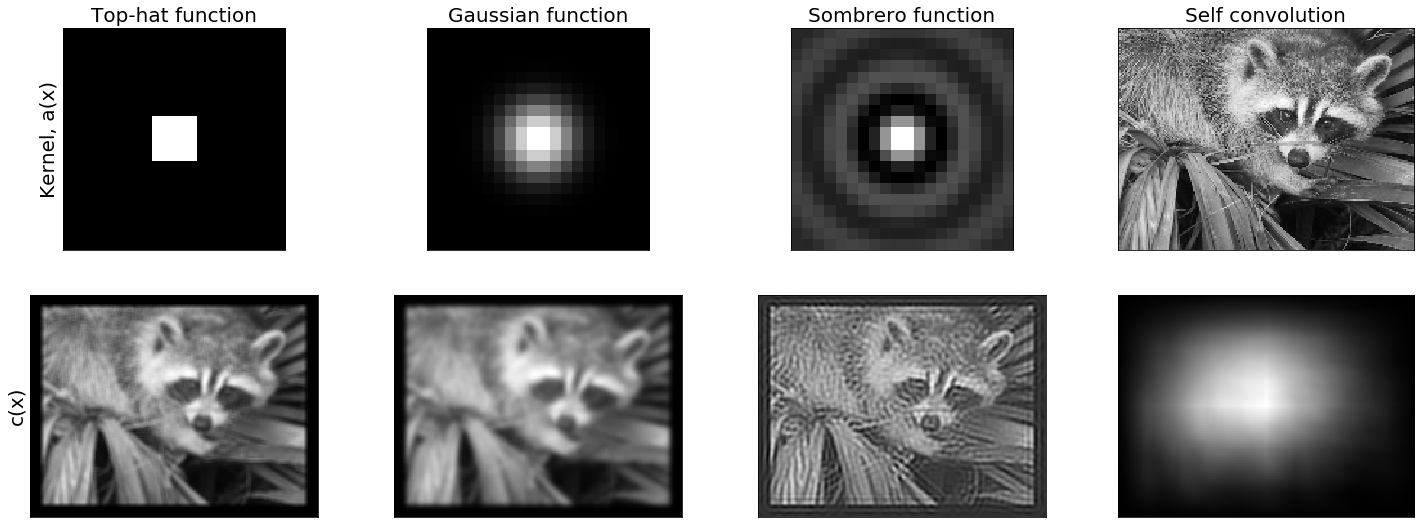

In [ ]:
def demo_convolutions():

    x = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, x)

    f = pl.figure(figsize = (25, 9))
    
    face_ds = face_R[0::5, 0::5]

    # top-hat function
    kernel = 1 * np.logical_and(np.abs(X) < 0.2, np.abs(Y) < 0.2)
    ax = f.add_subplot(241)
    ax.set_ylabel('Kernel, a(x)', fontsize = 20)
    ax.set_title('Top-hat function', fontsize = 20)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])

    ax = f.add_subplot(245)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_ylabel('c(x)', fontsize = 20)

    # Gaussian function
    variance = 0.05
    kernel = 1.0 / (2 * np.pi * variance) * np.exp(-0.5 * (X**2 + Y**2) / variance)
    ax = f.add_subplot(242)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title('Gaussian function', fontsize = 20)

    ax = f.add_subplot(246)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])

    # Sinc/sombrero function
    r = np.sqrt(X**2 + Y**2)
    kernel = np.sinc(4*r)
    ax = f.add_subplot(243)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title('Sombrero function', fontsize = 20)

    ax = f.add_subplot(247)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])


    # self-convolution
    kernel = face_ds
    ax = f.add_subplot(244)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title('Self convolution', fontsize = 20)

    ax = f.add_subplot(248)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    
    pl.show()

demo_convolutions()


# Fourier Theory

In [ ]:
def play_mono_wave_form(t, wf, chunk = 1024, sample_width = 2):
    '''
    This function will play a waveform, wf (-1 <= wf <= 1), given the time, t.
    There should be no need to modify 'chunk' or 'sample_width'
    
    '''

    sample_rate = int(float(len(wf)) / t.max())
    
    if wf.min() < -1.0 or wf.max() > 1.0:
        raise Exception("wf must have values -1 < wf < 1")
    
    # instantiate PyAudio (1)
    p = pyaudio.PyAudio()

    # open stream (2)
    stream = p.open(format=p.get_format_from_width(2),
                    channels=1,
                    rate=sample_rate,
                    output=True)

    # Convert to bytes
    data = ""
    for wf_ in wf:
        data = data + struct.pack("<h", int(32767.0 * wf_))

    # play stream (3)
    for i in range(0, len(data), chunk):
        stream.write(data[i:i+chunk])

    # stop stream (4)
    stream.stop_stream()
    stream.close()

    # close PyAudio (5)
    p.terminate()

## Motivation

<div style="float: left; width: 50%;">
<br>
<ul>
<li>Diverting from images for the moment, let's think about what makes up different sounds:  <br><br>
 <li> Sound is propagated through a meterial such as air through a series of <b>compression waves</b>: the air is made to compress and refract, and this transfers energy from the object causing the waves to your ear so that you hear a sound. <br><br>
    <li> The <b>frequency</b> , $\nu$, of the sound wave is what causes you to hear a different <b>pitch</b>.<br><br>
    <li> The <b>amplitude</b> of the sound wave changes the <b>intensity</b> (or volume) of the sound.
</ul>
</div>
<div style="float: left; width: 50%;">
<br><br>
<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/wave_example.pdf?raw=1" style="width:80%;">
</center>
</div>

## Examples of sounds waves

In [ ]:
amplitude_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=1.0, description = 'Amplitude', continuous_update=False)
frequency_slider = FloatSlider(min=100, max=2000, step=10, value=440, description = 'Frequency', continuous_update=False)

@interact(amplitude=amplitude_slider, frequency=frequency_slider)
def sw_example(amplitude, frequency):
    
    duration = 2 # Play the sound for 2 seconds
    frame_rate = 44100
    
    t = np.linspace(0, duration, frame_rate * duration)
    
    wf = amplitude * np.cos(t * 2 *np.pi * frequency)
    
    fig = pl.figure(figsize = (9, 7))
    ax = fig.add_subplot(111)
    ax.plot(t[0:1000], wf[0:1000], color='r', lw=5, alpha=0.8)
    ax.set_xlabel('Time (s)', fontsize = 15.0)
    ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
    pl.tight_layout()
    pl.show()
    play_mono_wave_form(t, wf)
    

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description=u'Amplitude', max=1.0, min=0.1), FloatSlider(value=440.0, continuous_update=False, description=u'Frequency', max=2000.0, min=100.0, step=10.0), Output()), _dom_classes=('widget-interact',))

## Two Frequencies Combined

In [ ]:

relative_amplitude_slider = FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, description = 'Rel. Amp.', continuous_update=False)
frequency_slider_1 = FloatSlider(min=100, max=2000, step=10, value=440, description = 'Frequency 1', continuous_update=False)
frequency_slider_2 = FloatSlider(min=100, max=2000, step=10, value=440, description = 'Frequency 2', continuous_update=False)


@interact(relative_amplitude=relative_amplitude_slider,
          frequency_1=frequency_slider_1, frequency_2=frequency_slider_2)
def sw2_example(relative_amplitude, frequency_1, frequency_2):
    
    duration = 2 # Play the sound for 2 seconds
    frame_rate = 44100
    
    t = np.linspace(0, duration, frame_rate * duration)
    
    # Create two waveforms and sum them to create the final output
    wf1 = relative_amplitude * np.cos(t * 2 *np.pi * frequency_1) 
    wf2 = (1-relative_amplitude) * np.cos(t * 2 *np.pi * frequency_2)
    wf = wf1 + wf2
    
    # Plot the separate waveforms and the combined waveform
    fig = pl.figure(figsize = (18, 7))
    
    ax1 = fig.add_subplot(121)
    ax1.plot(t[0:1000], wf[0:1000], 'r', lw=5, alpha=0.8)
    ax1.set_xlabel('Time (s)', fontsize = 15.0)
    ax1.set_ylabel('Amplitude',  fontsize = 15.0), ax1.set_ylim((-1, 1))
    
    ax2 = fig.add_subplot(122)
    ax2.plot(t[0:1000], wf1[0:1000], 'g', lw=5, alpha=0.8, label = 'Freq. 1')
    ax2.plot(t[0:1000], wf2[0:1000], 'b', lw=5, alpha=0.8, label = 'Freq. 2')
    ax2.set_xlabel('Time (s)', fontsize = 15.0)
    ax2.set_ylabel('Amplitude',  fontsize = 15.0), ax2.set_ylim((-1, 1))
    pl.legend(loc = 1, fontsize = 15)
    pl.tight_layout()
    pl.show()
    
    # Play the combined waveform
    play_mono_wave_form(t, wf)
    

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description=u'Rel. Amp.', max=1.0), FloatSlider(value=440.0, continuous_update=False, description=u'Frequency 1', max=2000.0, min=100.0, step=10.0), FloatSlider(value=440.0, continuous_update=False, description=u'Frequency 2', max=2000.0, min=100.0, step=10.0), Output()), _dom_classes=('widget-interact',))

## Three Frequencies Combined
The ear can be good at depicting different frequencies, but is can be difficult to identify these visually.

In [ ]:

frequency_slider_1 = FloatSlider(min=100, max=2000, step=10, value=440, description = 'Frequency 1', continuous_update=False)
frequency_slider_2 = FloatSlider(min=100, max=2000, step=10, value=440, description = 'Frequency 2', continuous_update=False)
frequency_slider_3 = FloatSlider(min=100, max=2000, step=10, value=440, description = 'Frequency 3', continuous_update=False)

@interact(frequency_1=frequency_slider_1, frequency_2=frequency_slider_2, frequency_3=frequency_slider_3)
def sw3_example(frequency_1, frequency_2, frequency_3):
    
    duration = 2 # Play the sound for 2 seconds
    frame_rate = 44100

    t = np.linspace(0, duration, frame_rate * duration)
    
    wf = 0.33 * np.cos(t * 2 *np.pi * frequency_1) + 0.33 * np.cos(t * 2 *np.pi * frequency_2) + 0.33 * np.cos(t * 2 *np.pi * frequency_3)
    
    fig = pl.figure(figsize = (9, 6))
    ax = fig.add_subplot(111)
    ax.plot(t[0:1000], wf[0:1000], color='r', lw=5, alpha=0.8)
    ax.set_xlabel('Time (s)', fontsize = 15.0)
    ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
    pl.tight_layout()
    pl.show()
    play_mono_wave_form(t, wf)
    

interactive(children=(FloatSlider(value=440.0, continuous_update=False, description=u'Frequency 1', max=2000.0, min=100.0, step=10.0), FloatSlider(value=440.0, continuous_update=False, description=u'Frequency 2', max=2000.0, min=100.0, step=10.0), FloatSlider(value=440.0, continuous_update=False, description=u'Frequency 3', max=2000.0, min=100.0, step=10.0), Output()), _dom_classes=('widget-interact',))

## Many frequencies combined

 - When multiple frequencies are combined, different sounds are produced.  This is why muscial instuments that play the same note sound different to each other. <br><br> 
 - For example, when middle C is plucked on a classical guitar, it sounds quite different to an acoustic guitar.  <br><br> 
 - Although the same note is played, the shape of the guitar body, the string material, the wood used, and the way the string is plucked add other frequencies to the main harmonic that give the instrument its characteristic sound: 

In [ ]:
def play_wav_file(wav_file, chunk = 1024):

    wav = wave.open(wav_file, 'rb')

    # instantiate PyAudio (1)
    p = pyaudio.PyAudio()

    # open stream (2)
    stream = p.open(format=p.get_format_from_width(wav.getsampwidth()),
                    channels=wav.getnchannels(),
                    rate=wav.getframerate(),
                    output=True)

    # read data
    data = wav.readframes(chunk)

    # play stream (3)
    while len(data) > 0:
        stream.write(data)
        data = wav.readframes(chunk)
        
    # stop stream (4)
    stream.stop_stream()
    stream.close()

    # close PyAudio (5)
    p.terminate()
    
def get_waveform(wav_file):
    
    wav = wave.open(wav_file, 'rb')

    wf = wav.readframes(-1)
    wf = np.fromstring(wf, 'Int16')
    
    t = np.arange(len(wf)).astype('float') / wav.getframerate()
    
    return t, np.array(wf).astype('float') / 32767.0
    
    

/Users/adminmblackledge/miniconda2/envs/main/lib/python2.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


HBox(children=(Button(description=u'classical', style=ButtonStyle()), Button(description=u'acoustic', style=ButtonStyle()), Button(description=u'middle c', style=ButtonStyle())))

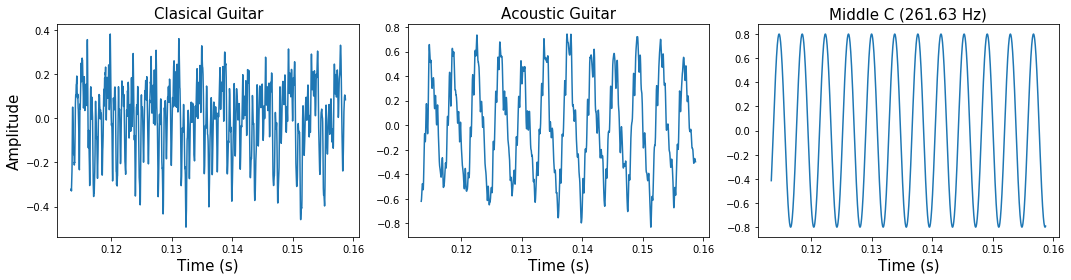

In [ ]:
# Buttons will be used to play the sound samples
button_classical = Button(description = 'classical')
button_acoustic = Button(description = 'acoustic')
button_c = Button(description = 'middle c')

fl_classical = "images/c_classical_loud.wav"
fl_acoustic = "images/c_acoustic_loud.wav"

t_classical, wf_classical = get_waveform(fl_classical)
t_acoustic, wf_acoustic = get_waveform(fl_acoustic)
wf_middle_c = np.cos(t_acoustic * 261.63 * 2 * np.pi)*0.8

def play_classical(change):
    play_wav_file(fl_classical)

def play_acoustic(change):
    play_wav_file(fl_acoustic)
    
def play_middle_c(change):
    play_mono_wave_form(t_acoustic, wf_middle_c)
    
button_classical.on_click(play_classical)
button_acoustic.on_click(play_acoustic)
button_c.on_click(play_middle_c)

hbox = HBox([button_classical, button_acoustic, button_c])
display(hbox)

idx = range(5000, 7000)
f = pl.figure(figsize = (15, 4))

ax = f.add_subplot(131)
ax.plot(t_classical[idx], wf_classical[idx])
ax.set_title('Clasical Guitar', fontsize = 15), ax.set_ylabel('Amplitude', fontsize = 15), ax.set_xlabel('Time (s)', fontsize = 15)

ax = f.add_subplot(132)
ax.plot(t_acoustic[idx], wf_acoustic[idx])
ax.set_title('Acoustic Guitar', fontsize = 15), ax.set_xlabel('Time (s)', fontsize = 15)

ax = f.add_subplot(133)
ax.plot(t_acoustic[idx], wf_middle_c[idx])
ax.set_title('Middle C (261.63 Hz)', fontsize = 15), ax.set_xlabel('Time (s)', fontsize = 15)

pl.tight_layout()
pl.show()


So how do we finf out which frequencies are present? <br><br>
This is the motivation behind __Fourier Theory__: to determine the combination of waves (frequencies and amplitudes) that make up a signal, whether this be in the temporal domain (sounds) or spatial domain (images).

## Some Definitions
 - The "inner product" of two functions, $f_{1}$ and $f_{2}$, over the interval $[a, b]$ is given by:
 $$
 \langle f_{1}, f_{2}\rangle = \int\limits_{a}^{b}f_{1}(t)f_{2}(t)\text{d}t
 $$
 - Two functions, $e_{1}$ and $e_{2}$, are considered __orthogonal__ if $\langle e_{1}, e_{2}\rangle$ = 0 <br><br>
 - An __orthonormal collection__ is a set of functions $\{e_{1}, e_{2}, \dots, e_{n}\}$ over the interval $[a, b]$ such that:
 $$
 \langle e_{i}, e_{j}\rangle = 
 \begin{cases}
 0,\qquad \text{if } i \neq j\\
 1,\qquad \text{if } i = j\\
 \end{cases}
 $$

## Orthogonal Cosine and Sine Functions

Consider two functions $e_{m}(t) = \cos(m x)$ and $e_{n}(t) = \cos(n x)$ over the interval $[-\pi, \pi]$, where $m, n \in \{0, 1, 2, 3, \dots\}$:<br><br>
\begin{align}
\langle e_{m}, e_{n}\rangle &= \int\limits_{-\pi}^{\pi} \cos(m t)\cos(n t)\text{d}t\\
&= \int\limits_{-\pi}^{\pi} \frac{1}{2}\left\{ \cos([m+n] t) + \cos([m-n] t)\right\} \text{d}t \\
&= \frac{1}{2}\left[\frac{1}{[m+n]}\sin([m+n] t) \right]_{-\pi}^{\pi} + \frac{1}{2}\left[\frac{1}{[m-n]}\sin([m-n] t) \right]_{-\pi}^{\pi}
=
\begin{cases}
0,\ \qquad \text{if } m \neq n \\
\pi,\ \qquad \text{if } m = n \neq 0 \\
2\pi,\qquad \text{if } m = n = 0
\end{cases}
\end{align}

## Orthogonal Cosine and Sine Functions
Equvalently, we can also find:
\begin{align}
\int\limits_{-\pi}^{\pi}\sin(mt)\sin(nt) =
\begin{cases}
0, \qquad \text{if } m \neq n \\
\pi, \qquad \text{if } m = n \neq 0 \\
0,\qquad \text{if } m = n = 0
\end{cases}
\end{align}
and
\begin{align}
\int\limits_{-\pi}^{\pi}\sin(mt)\cos(mt) = 0
\end{align}
so that the following is an __orthogonal set__ of functions:<br><br>
$$\left\{1, \cos(t), \sin(t), \cos(2t), \sin(2t), \cos(3t), \sin(3t), \dots\right\}$$

## Fourier Series
Consider now an arbitrary function $f(t)$ on the interval $[-\pi, \pi]$, and write it as a weighted summation of these trignometric __basis functions__:<br><br>
$$
f(t) = \frac{a_{0}}{2} + a_{1}\cos(t) + b_{1}\sin(t) + a_{2}\cos(2t) + b_{2}\sin(2t) + \dots
$$<br>
How do we find the coefficients $a_{0}, a_{1}, b_{1}, \dots$?

We can use the fact that these basis functions are orthogonal. <br>For example:
\begin{gather*}
\int\limits_{-\pi}^{\pi}\cos(2t)\cdot f(t)\text{d}t = \int\limits_{-\pi}^{\pi}\cos(2t)\cdot \left(\frac{a_{0}}{2} + a_{1}\cos(t) + b_{1}\sin(t) + a_{2}\cos(2x) + b_{2}\sin(2t) + \dots\right)\text{d}t \\
= \frac{a_{0}}{2}\int\limits_{-\pi}^{\pi}\cos(2t)\text{d}t + a_{1}\int\limits_{-\pi}^{\pi}\cos(2t)\cos(t)\text{d}t + b_{1}\int\limits_{-\pi}^{\pi}\cos(2t)\sin(t)\text{d}t + \\a_{2}\int\limits_{-\pi}^{\pi}\cos(2t)\cos(2t)\text{d}t + b_{2}\int\limits_{-\pi}^{\pi}\cos(2t)\sin(2t)\text{d}t + \dots \\
= 0 + 0 + 0 + a_{2}\cdot\pi + 0 + \dots
\end{gather*}<br><br>
And so we can find $a_{2}$ by:
$$
a_{2} = \frac{1}{\pi}\int\limits_{-\pi}^{\pi}\cos(2t)f(t)\text{d}t
$$

The __Fourier Series__ of a function $f(t)$ where $t \in [-\pi, \pi]$ is thus an expansion over the orthogonal set trignometric functions:<br><br>
$$
f(t) = \frac{a_{0}}{2} + \sum\limits_{n=1}^{\infty}\left(a_{1}\cos(nt) + b_{n}\sin(nt)\right)
$$
where,
\begin{align}
a_{0} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi} f(t)\text{d}t, \qquad a_{n} = \frac{1}{\pi}\int\limits_{-\pi}^{\pi} \cos(nt)\cdot f(t)\text{d}t, \qquad b_{n} = \frac{1}{\pi}\int\limits_{-\pi}^{\pi} \sin(nx)\cdot f(t)\text{d}t
\end{align}

## Fourier Series Example
Consider the function $f(t) = t^{2}$ over the interval $[-\pi, \pi]$.  We have that:
\begin{align}
\frac{a_{0}}{2} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi}t^{2}\text{d}t = \frac{1}{3}\pi^{2} \\
a_{n} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi}\cos(nt)t^{2}\text{d}t = (-1)^{n}\frac{4}{n^{2}}\\
b_{n} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi}\sin(nt)t^{2}\text{d}t = 0
\end{align}


Therefore,
$$
t^{2} \approx \frac{1}{3}\pi^{2} - 4\cos(t) + \cos(2t) - \frac{4}{9}\cos(3t) + \frac{1}{4}\cos(4t) - \frac{4}{25}\cos(5t) + \dots
$$

In [ ]:

n_slider = IntSlider(min=0, max=20, step=1, value=0.0, description = 'number of terms', continuous_update=False)

@interact(n=n_slider)
def plot_fourier_series(n):
    
    t = np.linspace(-np.pi, np.pi, 1000)
    f = t**2
    
    f_est = np.repeat(1.0/3 * np.pi**2, t.size)
    
    for n_ in range(1, n+1):
        f_est = f_est + (-1)**n_ * 4.0 / n_**2 * np.cos(n_*t)
    
    fig = pl.figure(figsize = (14, 7))
    ax = fig.add_subplot(121)
    ax.plot(t, f, color='k', lw=5, alpha=0.8, label = r'$t^{2}$')
    ax.plot(t, f_est, color='r', lw=5, alpha=0.8, label = r'Estimate of $t^{2}$')
    ax.set_xlabel('t', fontsize = 15), ax.set_ylim((-1, 11))
    pl.legend(loc = 1, fontsize = 15)
    
    ax = fig.add_subplot(122)
    ax.plot(t, f_est - f, color='r', lw=5, alpha=0.8, label = r'Difference')
    ax.set_xlabel('t', fontsize = 15)
    pl.legend(loc = 1, fontsize = 15), ax.set_ylim((-3, 3))
    pl.tight_layout()
    pl.show()


interactive(children=(IntSlider(value=0, continuous_update=False, description=u'number of terms', max=20), Output()), _dom_classes=('widget-interact',))

## Arbitrary Intervals
If a different interval is required, say $[-p, p]$, this can be achieved through a change of variables $t = \frac{\pi}{p}\tau$:<br><br>
\begin{align}
f(\tau) = \frac{a_{0}}{2} + \sum\limits_{n=1}^{\infty}a_{n}\cos\left(\frac{n\pi\tau}{p}\right) + b_{n}\sin\left(\frac{n\pi\tau}{p}\right)
\end{align}
where, 
\begin{align}
a_{0} = \frac{1}{p}\int\limits_{-p}^{p}f(\tau)\text{d}\tau, \qquad a_{n} = \frac{1}{p}\int\limits_{-p}^{p}f(\tau)\cos\left(\frac{n\pi\tau}{p}\right)\text{d}\tau, \qquad b_{n} = \frac{1}{p}\int\limits_{-p}^{p}f(\tau)\sin\left(\frac{n\pi\tau}{p}\right)\text{d}\tau
\end{align}

## Complex Fourier Series
It is possible to simplify the Fourier series using Euler's formula: $e^{i\theta} = \cos(\theta) + i\sin(\theta)$<br><br>
$$
\cos\left(\frac{n\pi\tau}{p}\right) = \frac{1}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) + \exp\left(-\frac{in\pi\tau}{p}\right)\right],\qquad \sin\left(\frac{n\pi\tau}{p}\right) = -\frac{i}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) - \exp\left(-\frac{in\pi\tau}{p}\right)\right]
$$
and so:
\begin{align}
f(\tau) &= \frac{a_{0}}{2} + \sum\limits_{n = 1}^{\infty} \frac{a_{n}}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) + \exp\left(-\frac{in\pi\tau}{p}\right)\right] -\frac{ib_{n}}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) - \exp\left(-\frac{in\pi\tau}{p}\right)\right] \\
&= \frac{a_{0}}{2} + \sum\limits_{n = 1}^{\infty} \frac{a_{n} - ib_{n}}{2}\exp\left(\frac{in\pi\tau}{p}\right) + \frac{a_{n} + ib_{n}}{2}\exp\left(-\frac{in\pi\tau}{p}\right)\\
&= \sum\limits_{n = -\infty}^{\infty} c_{n}\exp\left(\frac{in\pi\tau}{p}\right)
\end{align}
where, 
$$
c_{n} = \frac{1}{2p}\int\limits_{-p}^{p}f(\tau)\exp\left(-\frac{in\pi\tau}{p}\right)\text{d}\tau
$$

## Periodic Extension
What happens outside the range $[-p, p]$? We know that: <br><br>
$$
\exp\left(-\frac{in\pi\tau}{p}\right) = \exp\left(-\frac{in\pi\tau}{p}\right)\cdot\exp\left(-i2n\pi\right) = \exp\left(-\frac{in\pi(\tau+2p)}{p}\right)
$$<br>
and so the estimate will be periodic with period $2p$:


In [ ]:
n_periodic_slider = IntSlider(min=0, max=40, step=1, value=0.0, description = 'n', continuous_update=False)

@interact(n=n_periodic_slider)
def plot_periodic_fourier_series(n):
    
    t = np.linspace(-4, 4, 5000)
    f = t
    
    f_est = np.repeat(0.0, t.size)
    
    for n_ in range(1, n+1):
        f_est = f_est + (-1)**(n_+1) * 2.0 / (n_*np.pi) * np.sin(n_*np.pi*t)
    
    fig = pl.figure(figsize = (9, 6))
    ax = fig.add_subplot(111)
    ax.plot(t, f, color='k', lw=5, alpha=0.8, label = r'$f(\tau) = \tau$')
    ax.plot(t, f_est, color='r', lw=5, alpha=0.8, label = r'Estimate of $f(\tau)$')
    ax.set_xlabel(r'$\tau$', fontsize = 15), ax.set_ylim((-2, 2))
    pl.legend(loc = 1, fontsize = 15)

interactive(children=(IntSlider(value=0, continuous_update=False, description=u'n', max=40), Output()), _dom_classes=('widget-interact',))

 - It is clear that the Fourier Series only approximates the function well over the period for which we have calculated the Fourier coefficients.  <br><br>
 - We can improve the approximation by extending the period of the coefficient calculation:



In [ ]:
# Define a slider that allows us to change p, the period of the fourier approximation
p_slider = FloatSlider(min=0.1, max=30, step=0.01, value=2.0, 
                     description = 'p', continuous_update=False)
n_slider_periodic_2 = IntSlider(min=0, max=40, step=1, value=0.0, description = 'number of terms', continuous_update=False)

@interact(p=p_slider, n=n_slider_periodic_2)
def plot_p_results(p, n):
    
    # Define the time over which to calculate te function
    t = np.linspace(-15, 15, 1000)

    # The true function
    f = t

    n_range = np.arange(-n, n+1, 1).astype('float')
    
    # Store the c_n values
    cn = []
    
    # Approximate the function using 
    f_est = np.zeros(len(t))
    for n_ in n_range:
        if not n_ == 0: 
            f_est = f_est + (-1)**(n_+1) * 1j * p / (n_*np.pi) * np.exp(-1j * n_ * np.pi * t / p)
            cn.append((-1)**(n_+1) * 1j * p / (n_ * np.pi))
        else:
            cn.append(0.0)
        
    cn = np.array(cn)
    
    fig = pl.figure(figsize = (15, 6))
    ax = fig.add_subplot(121)
    ax.plot(t, f, color='k', lw=5, alpha=0.8, label = r'$f(\tau) = \tau$')
    ax.plot(t, f_est.real, color='r', lw=5, alpha=0.8, label = r'Estimate of $f(\tau)$')
    ax.set_xlabel(r'$\tau$ (s)', fontsize = 15)
    ax.set_ylabel(r'f($\tau$)', fontsize = 15)
    pl.legend(loc = 1, fontsize = 15)
    
    ax = fig.add_subplot(122)
    ax.plot(n_range / (2*p), cn.imag, 'ro-', lw=1, alpha=0.8)
    ax.set_xlabel(r'$\xi$ = n / 2p (Hz)', fontsize = 15)
    ax.set_ylabel(r'C$_{n}$', fontsize = 15)
#     ax.set_xlim((-30, 30))
    
    pl.tight_layout()
    pl.show()

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description=u'p', max=30.0, min=0.1, step=0.01), IntSlider(value=0, continuous_update=False, description=u'number of terms', max=40), Output()), _dom_classes=('widget-interact',))

 - So can we extend $p\rightarrow\infty$, so that we don't have to worry about the function being periodic?

 - __Yes__!  But we have to consider the fact that $\xi$ = n / 2p becomes continuous.  <br><br>
 - Rather than a discrete $c_{n}$, we end up with a function F($\xi$) <br><br>
 - This leads to the __Fourier Transform__ pair that convert from temporal space (e.g. time $\tau$, or spatial position $x$) to frequency space ($\xi$) and vice-versa:
\begin{align}
F(\xi) = \text{FT}\{f(\tau) \} = \int\limits_{-\infty}^{\infty}f(\tau)e^{i2\pi\xi\tau}\text{d}\tau\\
f(\tau) = \text{FT}^{-1}\{F(\xi) \} = \int\limits_{-\infty}^{\infty}F(\xi)e^{-i2\pi\xi\tau}\text{d}\xi
\end{align}

## Fourier Transform
 - For our application (images), it is important to know that the Fourier transform can be applied in more than one dimension:<br><br>
\begin{align}
f(x, y) = \iint\limits_{-\infty}^{\infty}F(k_{x}, k_{y})e^{-i2\pi(k_{x}x + k_{y}y)}\text{d}k_{x}\text{d}k_{y}\qquad \Leftrightarrow \qquad F(k_{x}, k_{y}) = \iint\limits_{-\infty}^{\infty}f(x, y)e^{+i2\pi(k_{x}x + k_{y}y)}\text{d}x\text{d}y\\
\end{align}<br><br>
 - We should also be aware of the __discrete__ Fourier transform, which is conventionaly calculated using the __Fast Fourier Transform__ (FFT):
 $$
  f[i, j] = \sum\limits_{m = 0}^{M-1}\sum\limits_{n = 0}^{N-1}F[m, n]\exp\left\{-2\pi i\left(\frac{im}{M} + \frac{jn}{N}\right)\right\} \qquad \Leftrightarrow \qquad F[m, n] = \frac{1}{MN}\sum\limits_{m = 0}^{M-1}\sum\limits_{n = 0}^{N-1}f[i, j]\exp\left\{+2\pi i\left(\frac{im}{M} + \frac{jn}{N}\right)\right\}
 $$
<br><br>
 - In general the $D$-dimensional (continuous) case:
\begin{align}
f(\mathbf{x}) = \int\limits_{\mathbb{R}^{D}}F(\mathbf{k})e^{-i2\pi\mathbf{k}\cdot\mathbf{x}}\text{d}\mathbf{k} \qquad F(\mathbf{k}) = \int\limits_{\mathbb{R}^{D}}f(\mathbf{x})e^{+i2\pi\mathbf{k}\cdot\mathbf{x}}\text{d}\mathbf{x}
\end{align}



## Examples of Fourier Transform
Below are some 1D and 2D examples of the Fourier transform in practice.

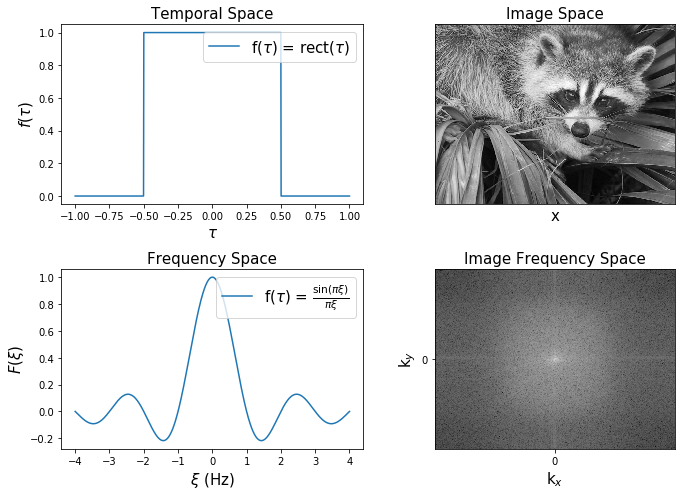

In [ ]:
fig_ft_examples, axs_ft_examples = pl.subplots(2, 2, figsize = (10, 7))

# First deomnstrate the top-hat function and its Fourier Transform
a = 0.5
x_ft_examples = np.linspace(-2*a, 2*a, 1000)
top_hat = 1 * (np.abs(x_ft_examples) < a)
axs_ft_examples[0, 0].plot(x_ft_examples, top_hat, label = r'f($\tau$) = rect($\tau$)')
axs_ft_examples[0, 0].set_xlabel(r'$\tau$', fontsize = 15), axs_ft_examples[0, 0].set_ylabel(r'$f(\tau)$', fontsize = 15)
axs_ft_examples[0, 0].set_title('Temporal Space', fontsize = 15)
axs_ft_examples[0, 0].legend(loc=1, fontsize = 15)

# The fourier trsanform of the top-hat is the sinc function
f_ft_examples = np.linspace(-4, 4, 1000)
sinc = np.sin(2*np.pi*f_ft_examples*a) / (np.pi * f_ft_examples)
axs_ft_examples[1, 0].plot(f_ft_examples, sinc, label = r'f($\tau$) = $\frac{\sin(\pi\xi)}{\pi\xi}$')
axs_ft_examples[1, 0].set_xlabel(r'$\xi$ (Hz)', fontsize = 15), axs_ft_examples[1, 0].set_ylabel(r'$F(\xi)$', fontsize = 15)
axs_ft_examples[1, 0].set_title('Frequency Space', fontsize = 15)
axs_ft_examples[1, 0].legend(loc=1, fontsize = 15)

# Now use the FFT to determine the Fourier Transform of an image
axs_ft_examples[0, 1].imshow(face_R, cmap = 'gray')
axs_ft_examples[0, 1].set_xticks([]), axs_ft_examples[0, 1].set_yticks([])
axs_ft_examples[0, 1].set_xlabel(r'x', fontsize = 15), axs_ft_examples[1, 1].set_ylabel(r'y', fontsize = 15);
axs_ft_examples[0, 1].set_title('Image Space', fontsize = 15)

# Find the FFT of the face image (red channel)
face_FFT = fft.fft2(face_R)

# Find the logarithm of power spectrum of the face image
face_PS = np.log(np.abs(face_FFT))

# Shift the PS to ensure is is zero-centered
face_ZC = fft.fftshift(face_PS
                      )
axs_ft_examples[1, 1].imshow(face_ZC, cmap = 'gray', extent = (-face_R.shape[1]/2, face_R.shape[1]/2, -face_R.shape[0]/2, face_R.shape[0]/2))
axs_ft_examples[1, 1].set_xticks([0.0]), axs_ft_examples[1, 1].set_yticks([0.0])
axs_ft_examples[1, 1].set_xlabel(r'k$_{x}$', fontsize = 15), axs_ft_examples[1, 1].set_ylabel(r'k$_{y}$', fontsize = 15)
axs_ft_examples[1, 1].set_title('Image Frequency Space', fontsize = 15)

pl.tight_layout()
pl.show()

## Properties of the Fourier Transform
### Linearity
For any complex numbers $a$ and $b$
$$
\text{FT}\{af(\tau) + bg(\tau)\} = aF(\xi) + bG(\xi)
$$
### Time Shift
For any real number $\alpha$
$$
\text{FT}\{f(\tau \pm \alpha)\} = e^{\mp i 2\pi \alpha\xi} \cdot F(\xi)
$$
### Frequency Shift
For any real number $\beta$
$$
\text{FT}^{-1}\{F(\xi \pm \beta)\} = e^{\mp i 2\pi \beta\tau} \cdot f(\tau)
$$

## Properties of the Fourier Transform
### Time Scaling
For any non-zero real value $\alpha$
$$
\text{FT}\{f(\alpha\cdot\tau)\} = \frac{1}{\alpha}\cdot F\left(\frac{\xi}{\alpha}\right)
$$

### Differentiation
If $f(\tau)$ is a differentiable function then:
$$
\text{FT}\left\{\frac{\partial}{\partial\tau}f(\tau)\right\} = e^{i2\pi\xi}F(\xi)
$$
(this fact can be used to help solve many complicated differential equations)

## Convolution Theorem
Consider two functions $f(\tau)$ and $g(\tau)$, and their respective Fourier transforms $F(\xi)$ and $G(\xi)$.  The fourier transform of the convolution of both functions equals the product of the repsective Fourier trasnforms and vice-versa:<br><br>
$$
\text{FT}\{f(\tau) \circledast g(\tau) \} = F(\xi)\cdot G(\xi)\qquad and \qquad \text{FT}^{-1}\{F(\xi) \circledast G(\xi) \} = f(\tau)\cdot g(\tau)
$$